Проект e-learning:
Продакт-менеджер Василий попросил вас проанализировать завершенные уроки и ответить на следующие вопросы:

1. Сколько студентов успешно сдали только один курс? (Успешная сдача — это зачёт по курсу на экзамене) (7 баллов).

2. Выяви самый сложный и самый простой экзамен: найди курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью

3. По каждому предмету определи средний срок сдачи экзаменов (под сдачей понимаем последнее успешное прохождение экзамена студентом)

4. Выяви самые популярные курсы (ТОП-3) по количеству регистраций на них. А также курсы с самым большим оттоком (ТОП-3)

5. Напиши функцию на python, позволяющую строить когортный (семестровый) анализ. В период с начала 2013 по конец 2014 выяви семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов. Описание подхода можно найти тут

6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации

In [854]:
#Производим импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
%matplotlib inline

In [817]:
#Импортируем функцию для вывода двух результатов на одной странице, функция с сайта stackoverflow.com
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

In [857]:
#Импортируем настройки графиков
sns.set(rc={'figure.figsize':(10,9)}, palette='viridis')

Производим чтение файлов и анализируем количество строк и столбцов, также pd.isna().any() проверяем наличие пропущенных значений.

In [822]:
#assessments - файл содержит информацию об оценках в тесте. Обычно каждый предмет в семестре включает ряд тестов с оценками, 
#за которыми следует заключительный экзаменационный тест (экзамен)
assessments = pd.read_csv(r'C:\Users\Пользователь\OneDrive\Документы\First_project_data\assessments.csv')
assessments

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


In [820]:
#courses - файл содержит список предметов по семестрам
courses = pd.read_csv(r'C:\Users\Пользователь\OneDrive\Документы\First_project_data\courses.csv')
courses

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


In [344]:
#studentAssessment -  файл содержит результаты тестов студентов. Если учащийся не отправляет работу на оценку, 
#результат не записывается в таблицу
studentAssessment = pd.read_csv(r'C:\Users\Пользователь\OneDrive\Документы\First_project_data\studentAssessment.csv')
studentAssessment

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


In [345]:
#studentRegistration - файл содержит информацию о времени, когда студент зарегистрировался для прохождения курса в семестре
studentRegistration = pd.read_csv(r'C:\Users\Пользователь\OneDrive\Документы\First_project_data\studentRegistration.csv')
studentRegistration

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0


**ЗАДАНИЕ 1. Сколько студентов успешно сдали только один курс? (Успешная сдача — это зачёт по курсу на экзамене)**

In [51]:
# Выводим список уникалных идентификаторов тестов для типа тестов - экзамен (Exam), исключаем - оценку преподавателя (TMA), 
#компьютерную оценку (СМА)
exam_spisok = list(assessments[assessments['assessment_type'] == 'Exam'].id_assessment.unique())
exam_spisok[:5]

[1757, 1763, 14990, 15002, 15014]

In [58]:
# Выводим из таблицы studentAssessment данные по списку идентификаторов тестов для типа тестов - экзамен
exam_assessments = studentAssessment.query('id_assessment in @exam_spisok')
exam_assessments

,id_assessment,id_student,date_submitted,is_banked,score
52923,24290,558914,230,0,32.0
52924,24290,559706,234,0,78.0
52925,24290,559770,230,0,54.0
52926,24290,560114,230,0,64.0
52927,24290,560311,234,0,100.0
...,...,...,...,...,...
95980,25368,652680,243,0,91.0
95981,25368,652732,249,0,47.0
95982,25368,652965,242,0,87.0
95983,25368,653051,242,0,27.0


In [17]:
# Выделяем студентов успешно завершивших курс (успешно сдавших тест).
#Оценка ниже 40 неудачная/неуспешная сдача теста, поэтому выделяем студенов получивших за тесты оценку >= 40
exam_assessments_successful = exam_assessments.query('score >= 40')
exam_assessments_successful

,id_assessment,id_student,date_submitted,is_banked,score
52924,24290,559706,234,0,78.0
52925,24290,559770,230,0,54.0
52926,24290,560114,230,0,64.0
52927,24290,560311,234,0,100.0
52928,24290,560494,230,0,92.0
...,...,...,...,...,...
95978,25368,652617,243,0,56.0
95980,25368,652680,243,0,91.0
95981,25368,652732,249,0,47.0
95982,25368,652965,242,0,87.0


In [25]:
#Проверяем, были ли пересдачи тестов(экзаменов)
exam_assessments_successful.is_banked.unique()

array([0], dtype=int64)

In [52]:
# Чтобы узнать, сколько студентов сдало только один экзамен, сгруппируем данные по id студента, посчитаем количество строк 
# по score, оставим только 'score == 1', применим shape и возьмем shape[0] - получаем число студентов
result_one_exam = exam_assessments_successful.groupby('id_student') \
    .agg({'score':'count'}) \
    .query('score == 1') \
    .shape[0]

result_one_exam

3802

In [53]:
#Для визуализации создаем таблицу
result_exam_plot = exam_assessments_successful.groupby('id_student', as_index = False) \
    .agg({'score':'count'})

result_exam_plot = result_exam_plot.groupby('score', as_index = False) \
    .agg({'id_student':'count'}) \
    .rename(columns={'score':'Quantity of successful tests', 'id_student':'Quantity of students'})

result_exam_plot

,Quantity of successful tests,Quantity of students
0,1,3802
1,2,295


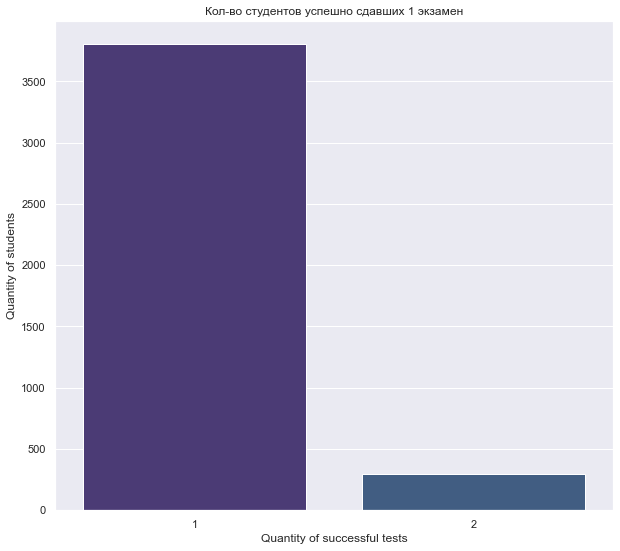

In [259]:
#Визуализируем результаты
ax = sns.barplot(data=result_exam_plot, x='Quantity of successful tests', y='Quantity of students')
ax.set(xlabel='Quantity of successful tests', ylabel='Quantity of students')
ax.set_title('Кол-во студентов успешно сдавших 1 экзамен')

plt.show()

**ЗАКЛЮЧЕНИЕ:**

Число студентов, успешно сдавших только один курс, что эквивалентно успешной сдаче одного экзамена, составляет 3802 человека. Большинство студентов (92.8%) сдали успешно только один тест/экзамен.

Была произведена проверка на наличие студентов, которые пересдавали экзамены, таких студентов выявлено не было.
Наличие таких студентов могло привести к тому, что некоторые студенты, которые отмечены, как сдавшие два экзамена, могли сдавать один и тот же экзамен, тем самым вносить ложные данные в полученные результаты.

**ЗАДАНИЕ 2. Выяви самый сложный и самый простой экзамен: найди курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью**

Примечание: завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен

In [80]:
#Объединим таблицы studentAssessment (результаты тестов студентов) и assessments (информация об оценках в тесте)
df1 = assessments.merge(studentAssessment, on = 'id_assessment', how='inner')

# Оставим тип теста экзамен по курсу (Exam). Исключаем оценку преподавателя (TMA) и компьютерную оценку (СМА)
df1_Exam = df1.query('assessment_type == "Exam"')
df1_Exam

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score
52923,CCC,2014B,24290,Exam,NaN,100.0,558914,230,0,32.0
52924,CCC,2014B,24290,Exam,NaN,100.0,559706,234,0,78.0
52925,CCC,2014B,24290,Exam,NaN,100.0,559770,230,0,54.0
52926,CCC,2014B,24290,Exam,NaN,100.0,560114,230,0,64.0
52927,CCC,2014B,24290,Exam,NaN,100.0,560311,234,0,100.0
...,...,...,...,...,...,...,...,...,...,...
95980,DDD,2014J,25368,Exam,NaN,100.0,652680,243,0,91.0
95981,DDD,2014J,25368,Exam,NaN,100.0,652732,249,0,47.0
95982,DDD,2014J,25368,Exam,NaN,100.0,652965,242,0,87.0
95983,DDD,2014J,25368,Exam,NaN,100.0,653051,242,0,27.0


In [95]:
#Подготовим результирующую таблицу сгруппировав количество студетов по предмету(code_module) и тесту(id_assessment). 
#Выявим полное количество студентов
df_2 = df1_Exam.groupby(['code_module', 'id_assessment'], as_index=False) \
    .agg({'id_student':'count'}) \
    .rename(columns={'id_student':'total_students'})

#Произведем расчет количества студентов успешно завершивших тесты, в разрезе по предмету(code_module) и тесту(id_assessment)
df_2_succ = df1_Exam.query('score >= 40') \
    .groupby(['code_module', 'id_assessment'], as_index=False) \
    .agg({'id_student':'count'}) \
    .rename(columns={'id_student':'successful_students'})

#Сформируем таблицу с данными по количеству студентов зарегистрированых на курс/экзамен и сдавших экзамен
df_3 = pd.concat([df_2, df_2_succ.successful_students], axis=1)

#Произведем расчет завершаемости курсов/экзаменов в %
df_3['success_percent'] = round(df_3.successful_students / df_3.total_students, 2)

df_3

,code_module,id_assessment,total_students,successful_students,success_percent
0,CCC,24290,747,664,0.89
1,CCC,24299,1168,1019,0.87
2,DDD,25340,602,504,0.84
3,DDD,25354,968,878,0.91
4,DDD,25361,524,485,0.93
5,DDD,25368,950,842,0.89


In [91]:
#Произведем поиск курса/экзамена с минимальной завершаемостью
df_3[df_3['success_percent'] == df_3.success_percent.min()]

,code_module,id_assessment,total_students,successful_students,success_percent
2,DDD,25340,602,504,0.84


In [92]:
#Произведем поиск курса/экзамена с максимальной завершаемостью
df_3[df_3['success_percent'] == df_3.success_percent.max()]

,code_module,id_assessment,total_students,successful_students,success_percent
4,DDD,25361,524,485,0.93


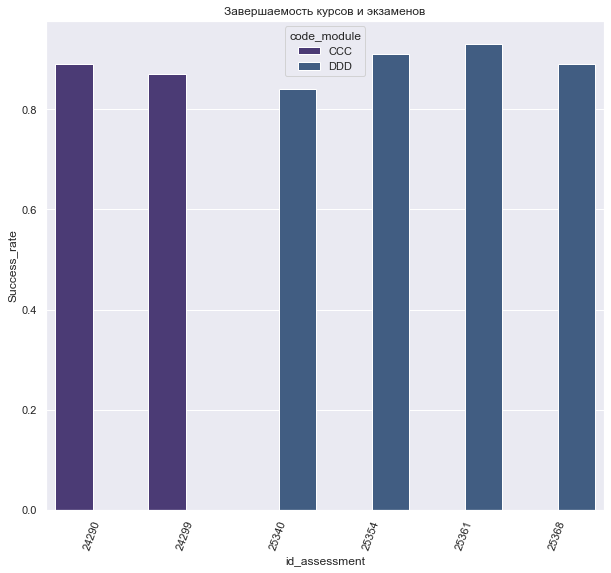

In [260]:
#Визуализируем завершаемость курсов и экзаменов
ax = sns.barplot(data=df_3, x='id_assessment', y='success_percent', hue='code_module')
ax.set(xlabel='id_assessment', ylabel='Success_rate')
plt.xticks(rotation=70)
ax.set_title('Завершаемость курсов и экзаменов')

plt.show()

**ЗАКЛЮЧЕНИЕ:**

Курс с самой низкой и самой высокой завершаемостью DDD. 

Экзамен с самой большой завершаемостью - 25361 (завершаемость 93%).
Экзамен с самой низкой завершаемостью - 25340 (завершаемость 84%).

**3. По каждому предмету определи средний срок сдачи экзаменов (под сдачей понимаем последнее успешное прохождение экзамена студентом)**

In [133]:
#Создадим таблицу, отсортировав из таблицы студентов сдававших экзамены (df1_Exam), полученной в задании 2, 
#студентов успешно сдавших экзамены.
df_Task_3=df1_Exam.query('score >= 40')

df_Task_3

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score
52924,CCC,2014B,24290,Exam,NaN,100.0,559706,234,0,78.0
52925,CCC,2014B,24290,Exam,NaN,100.0,559770,230,0,54.0
52926,CCC,2014B,24290,Exam,NaN,100.0,560114,230,0,64.0
52927,CCC,2014B,24290,Exam,NaN,100.0,560311,234,0,100.0
52928,CCC,2014B,24290,Exam,NaN,100.0,560494,230,0,92.0
...,...,...,...,...,...,...,...,...,...,...
95978,DDD,2014J,25368,Exam,NaN,100.0,652617,243,0,56.0
95980,DDD,2014J,25368,Exam,NaN,100.0,652680,243,0,91.0
95981,DDD,2014J,25368,Exam,NaN,100.0,652732,249,0,47.0
95982,DDD,2014J,25368,Exam,NaN,100.0,652965,242,0,87.0


In [134]:
#Определим какие уникальные предметы содержатся в code_modul
df_Task_3.code_module.unique()

array(['CCC', 'DDD'], dtype=object)

С учетом того, что под сдачей понимаем последнее успешное прохождение экзамена студентом, необходимо проверить сдавался ли один и тот же экзамен одним и тем же студентом несколько раз, т.е. в случае пресдачи учитывать только последнюю успешную сдачу экзамена.

In [135]:
#Сформируем по предмету ССС перечень всеуспешные сдачи
CCC_40 = df_Task_3[df_Task_3['code_module'] == 'CCC']

#Сформируем по предмету DDD перечень всеуспешные сдачи
DDD_40 = df_Task_3[df_Task_3['code_module'] == 'DDD']

In [136]:
#Установим есть ли факты пересдачи экзаменов по предмету. Сравним количество фактв сдачи с количеством уникальных 
#идентификаторов студентов (id_student). При отсутствии пересдач отличий в значениях не будет.

In [137]:
#Проанализируем количество фактв сдачи предмета ССС
df_Task_3[df_Task_3['code_module'] == 'CCC'].shape

(1683, 10)

In [138]:
#Проанализируем количеством уникальных идентификаторов студентов (id_student) по предмету ССС
df_Task_3[df_Task_3['code_module'] == 'CCC'].id_student.nunique()

1683

In [139]:
#Проанализируем количество фактов сдачи предмета DDD
df_Task_3[df_Task_3['code_module'] == 'DDD'].shape

(2709, 10)

In [140]:
#Проанализируем количеством уникальных идентификаторов студентов (id_student) по предмету DDD
df_Task_3[df_Task_3['code_module'] == 'DDD'].id_student.nunique()

2706

Для экзамена по предмету CCC факта пересдачи не установлено.
Для экзамена по предмету DDD установлен факт повторной сдачи в количестве 3 раз, необходимо определить id студентов, которые сдавали экзамен повторно и учесть только последний успешный.

In [141]:
#Установим факты повторной сдачи, создадим колонку для выявления студентов (id_student)
DDD_40["is_duplicate"]= DDD_40.id_student.duplicated()

DDD_40.query('is_duplicate == True')

C:\Users\73B5~1\AppData\Local\Temp/ipykernel_4328/3008404192.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score,is_duplicate
87573,DDD,2014B,25361,Exam,241.0,100.0,540758,234,0,60.0,True
95711,DDD,2014J,25368,Exam,NaN,100.0,593903,243,0,44.0,True
95749,DDD,2014J,25368,Exam,NaN,100.0,605118,243,0,64.0,True


In [142]:
#Выведем студентов сдававших экзамен несколько раз. Выявим факты сдачи, которые необходимо исключить.
#Оставим экзамены, которые были сданы во второй раз (последний факт сдачи по полю date_submitted).
DDD_40.query('id_student == 540758 or id_student == 593903 or id_student == 605118')

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score,is_duplicate
75235,DDD,2013B,25340,Exam,240.0,100.0,540758,229,0,40.0,False
82731,DDD,2013J,25354,Exam,261.0,100.0,593903,241,0,49.0,False
82844,DDD,2013J,25354,Exam,261.0,100.0,605118,237,0,42.0,False
87573,DDD,2014B,25361,Exam,241.0,100.0,540758,234,0,60.0,True
95711,DDD,2014J,25368,Exam,NaN,100.0,593903,243,0,44.0,True
95749,DDD,2014J,25368,Exam,NaN,100.0,605118,243,0,64.0,True


In [143]:
#Удалим строки не являющиеся последней успешной сдачей экзамена, также удалим колонку is_duplicate 
DDD_40 = DDD_40 \
                .drop(labels = [75235, 82731, 82844],axis = 0) \
                .drop(labels = 'is_duplicate', axis = 1)
DDD_40

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score
74892,DDD,2013B,25340,Exam,240.0,100.0,45664,230,0,40.0
74894,DDD,2013B,25340,Exam,240.0,100.0,53488,231,0,73.0
74895,DDD,2013B,25340,Exam,240.0,100.0,60135,229,0,40.0
74896,DDD,2013B,25340,Exam,240.0,100.0,67602,230,0,49.0
74898,DDD,2013B,25340,Exam,240.0,100.0,69491,230,0,51.0
...,...,...,...,...,...,...,...,...,...,...
95978,DDD,2014J,25368,Exam,NaN,100.0,652617,243,0,56.0
95980,DDD,2014J,25368,Exam,NaN,100.0,652680,243,0,91.0
95981,DDD,2014J,25368,Exam,NaN,100.0,652732,249,0,47.0
95982,DDD,2014J,25368,Exam,NaN,100.0,652965,242,0,87.0


In [159]:
#Для предмета DDD сруппируем данные по предмету и тесту (code_module и id_assessment), посчитаеи сумму по date_submitted 
#и количество фактов сдачи тестов
pass_term_total = DDD_40.groupby(['id_assessment', 'code_module'], as_index=False) \
    .agg({'date_submitted':'sum', 'score':'count'}) \
    .rename(columns={'score':'exam_quantity'})

pass_term_total = pass_term_total.assign(avg_deadline = pass_term_total \
                                                                    .date_submitted / pass_term_total.exam_quantity) \
                                                                    .round(2)
pass_term_total

,id_assessment,code_module,date_submitted,exam_quantity,avg_deadline
0,25340,DDD,115774,503,230.17
1,25354,DDD,209811,876,239.51
2,25361,DDD,113944,485,234.94
3,25368,DDD,204441,842,242.80


In [160]:
#Для предмета CCC сруппируем данные по предмету и тесту (code_module и id_assessment), посчитаеи сумму по date_submitted 
#и количество фактов сдачи тестов
pass_term_total_1 = CCC_40.groupby(['id_assessment', 'code_module'], as_index=False) \
    .agg({'date_submitted':'sum', 'score':'count'}) \
    .rename(columns={'score':'exam_quantity'})

pass_term_total_1 = pass_term_total_1 \
                                .assign(avg_deadline = pass_term_total_1.date_submitted / pass_term_total_1.exam_quantity) \
                                .round(2)
pass_term_total_1

,id_assessment,code_module,date_submitted,exam_quantity,avg_deadline
0,24290,CCC,153770,664,231.58
1,24299,CCC,249048,1019,244.40


In [151]:
#Соединим результрующие таблицы по предметам DDD и CCC
final_table = pd.concat([pass_term_total, pass_term_total_1], ignore_index=True)

final_table

,id_assessment,code_module,date_submitted,exam_quantity,avg_deadline
0,25340,DDD,115774,503,230.17
1,25354,DDD,209811,876,239.51
2,25361,DDD,113944,485,234.94
3,25368,DDD,204441,842,242.80
4,24290,CCC,153770,664,231.58
5,24299,CCC,249048,1019,244.40


In [164]:
#Вычислим средний срок сдачи пердметов
final_table_2 = final_table.groupby('code_module', as_index=False) \
    .agg({'date_submitted':'sum', 'exam_quantity':'sum'})

final_table_2 = final_table_2 \
                            .assign(avg_deadline = final_table_2.date_submitted /final_table_2.exam_quantity) \
                            .round(2)
final_table_2

,code_module,date_submitted,exam_quantity,avg_deadline
0,CCC,402818,1683,239.35
1,DDD,643970,2706,237.98


In [177]:
#Выведем результат анализа среднего срока сдачи экзаменов по предметам
for i in range(final_table_2.shape[0]):
    code = final_table_2.code_module[i]
    avg_deadline = final_table_2.avg_deadline[i].round()
    print(f'Для предмета {code} средний срок сдачи экзамена составляет {avg_deadline} дней')

Для предмета CCC средний срок сдачи экзамена составляет 239.0 дней
Для предмета DDD средний срок сдачи экзамена составляет 238.0 дней


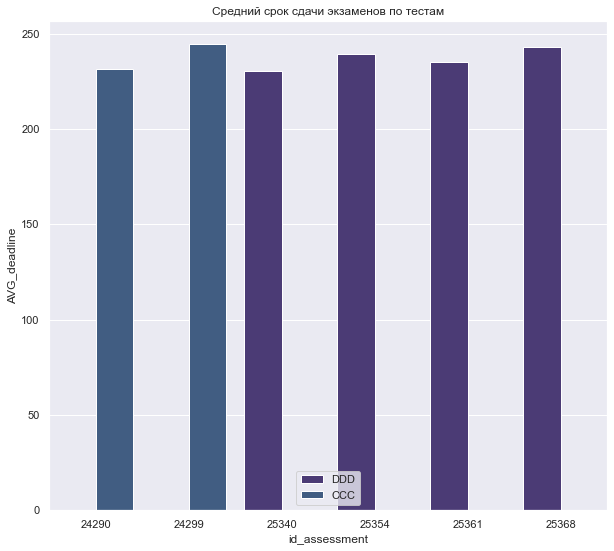

In [271]:
#Визуализируем средний срок сдачи экзаменов по тестам
ax = sns.barplot(data=final_table, x='id_assessment', y='avg_deadline', hue='code_module')
ax.set_title('Cредний срок сдачи экзаменов по тестам')
ax.set(xlabel='id_assessment', ylabel='AVG_deadline')

plt.legend(loc="lower center")

plt.show()

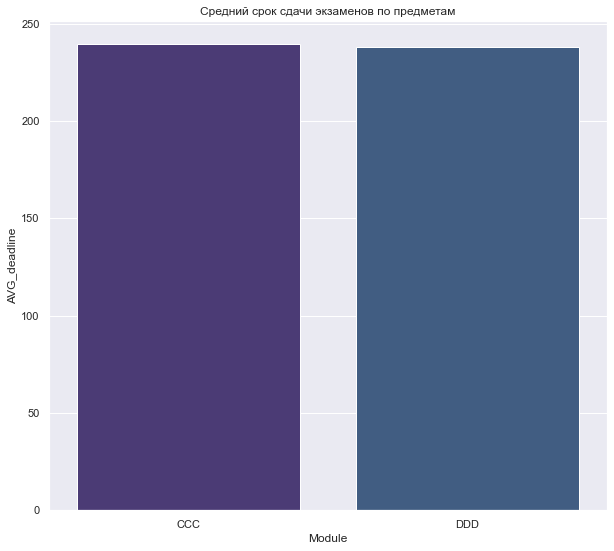

In [270]:
#Визуализируем средний срок сдачи экзаменов по предметам
ax = sns.barplot(data=final_table_2, x='code_module', y='avg_deadline')
ax.set_title('Cредний срок сдачи экзаменов по предметам')
ax.set(xlabel='Module', ylabel='AVG_deadline')

plt.show()

***ЗАКЛЮЧЕНИЕ:***

Студентами сдавались только два предмета CCC и DDD.

Для предмета CCC средний срок сдачи экзамена составл 239.0 дней

Для предмета DDD средний срок сдачи экзамена составил 238.0 дней

**4. Выяви самые популярные курсы (ТОП-3) по количеству регистраций на них. А также курсы с самым большим оттоком (ТОП-3)**

In [215]:
#Выведем таблицу
studentRegistration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [216]:
#Определим самые популярные курсы
top3_code_module = studentRegistration \
                    .groupby('code_module', as_index = False)\
                    .agg({'id_student':'count'}) \
                    .sort_values('id_student', ascending = False) \
                    .rename(columns={'id_student':'quantity_of_registration'})
top3_code_module

,code_module,quantity_of_registration
1,BBB,7909
5,FFF,7762
3,DDD,6272
2,CCC,4434
4,EEE,2934
6,GGG,2534
0,AAA,748


In [217]:
#Определим курсы с самым большим оттоком (ТОП-3). Выведем рабочую таблтцу
outflow_top = studentRegistration[['code_module', 'id_student', 'date_registration', 'date_unregistration']]
outflow_top.head()

,code_module,id_student,date_registration,date_unregistration
0,AAA,11391,-159.0,NaN
1,AAA,28400,-53.0,NaN
2,AAA,30268,-92.0,12.0
3,AAA,31604,-52.0,NaN
4,AAA,32885,-176.0,NaN


In [218]:
# Создадим функцию для определения студентов, которые отменили регистрацию
def unreg_or_not(x):
    if x >= 0 or x < 0:
        return 1
    else:
        return 0

In [219]:
# Применим функцию и выявим студентов, которые отменили регистрацию (по оттоку)

outflow_top = outflow_top.assign(unreg_or_not = [unreg_or_not(i) for i in outflow_top.date_unregistration])

outflow_top.head()

,code_module,id_student,date_registration,date_unregistration,unreg_or_not
0,AAA,11391,-159.0,NaN,0
1,AAA,28400,-53.0,NaN,0
2,AAA,30268,-92.0,12.0,1
3,AAA,31604,-52.0,NaN,0
4,AAA,32885,-176.0,NaN,0


In [220]:
#Определим количество студентов, отменивших регистрацию
outflow_top = outflow_top.groupby('code_module', as_index = False) \
    .agg({'unreg_or_not':'sum'}) \
    .sort_values('unreg_or_not', ascending = False) \
    .rename(columns={'unreg_or_not':'unreg_quantity'})

outflow_top

,code_module,unreg_quantity
5,FFF,2380
1,BBB,2377
3,DDD,2235
2,CCC,1947
4,EEE,718
6,GGG,289
0,AAA,126


In [229]:
print(f'В ТОП-3 самых популярных курсов входят {list(top3_code_module.code_module[0:3])}, а в ТОП-3 по отмене регистрации {list(outflow_top.code_module[0:3])}')

В ТОП-3 самых популярных курсов входят ['BBB', 'FFF', 'DDD'], а в ТОП-3 по отмене регистрации ['FFF', 'BBB', 'DDD']


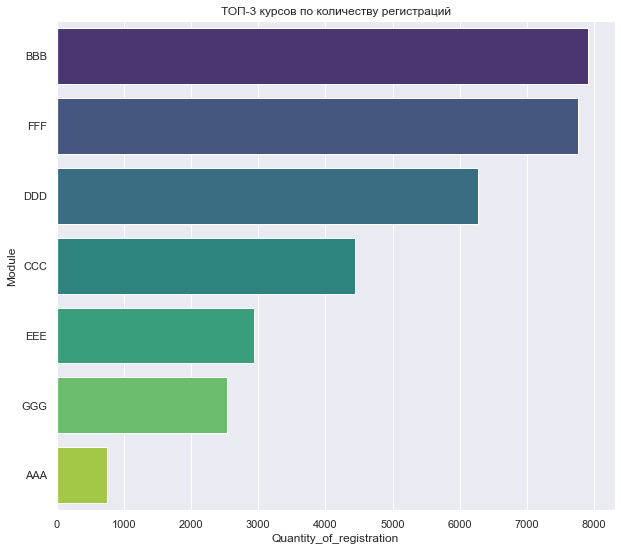

In [306]:
#Визуализируем ТОП-3 курсов по количеству регистраций
ax = sns.barplot(data=top3_code_module, x='quantity_of_registration', y='code_module',  palette='viridis')
ax.set_title('ТОП-3 курсов по количеству регистраций')
ax.set(xlabel='Quantity_of_registration', ylabel='Module')

plt.show()

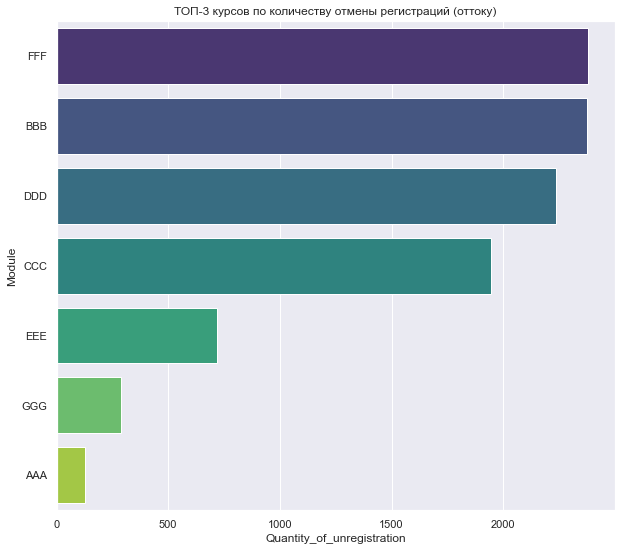

In [307]:
#Визуализируем ТОП-3 курсов по количеству отмены регистраций (оттоку)
ax = sns.barplot(data=outflow_top, x='unreg_quantity', y='code_module',  palette='viridis')
ax.set_title('ТОП-3 курсов по количеству отмены регистраций (оттоку)')
ax.set(xlabel='Quantity_of_unregistration', ylabel='Module')

plt.show()

In [289]:
#Построим ТОП-3 курсов по количеству отмены регистраций (оттоку) в процентном отношении 
#зарегистрированных и отменивших регистрацию студентов
percent_of_unreg = top3_code_module.merge(outflow_top,  on = 'code_module', how='inner')
percent_of_unreg['percent_unreg'] = (percent_of_unreg.unreg_quantity *100) / percent_of_unreg.quantity_of_registration
percent_of_unreg = percent_of_unreg.sort_values('percent_unreg', ascending=False)

percent_of_unreg

,code_module,quantity_of_registration,unreg_quantity,percent_unreg
3,CCC,4434,1947,43.910690
2,DDD,6272,2235,35.634566
1,FFF,7762,2380,30.662200
0,BBB,7909,2377,30.054368
4,EEE,2934,718,24.471711
6,AAA,748,126,16.844920
5,GGG,2534,289,11.404893


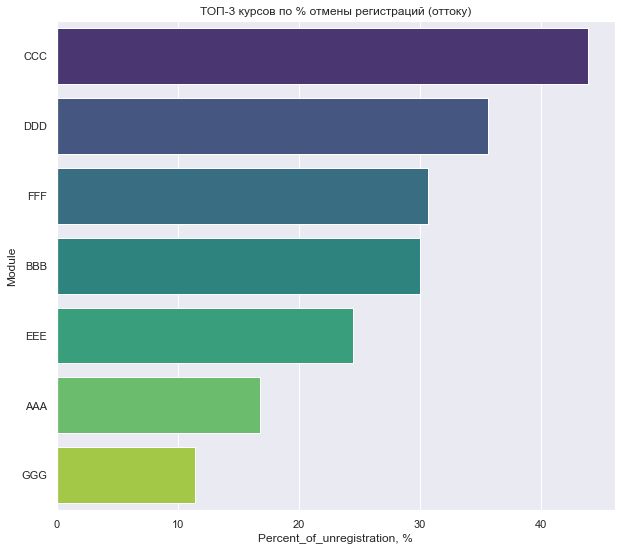

In [329]:
#Визуализируем ТОП-3 курсов по количеству отмены регистраций (оттоку) в процентном отношении от общего числа регистраций
ax = sns.barplot(data=percent_of_unreg, x='percent_unreg', y='code_module', palette='viridis')
ax.set_title('ТОП-3 курсов по % отмены регистраций (оттоку)')
ax.set(xlabel='Percent_of_unregistration, %', ylabel='Module')

plt.show()

***ЗАКЛЮЧЕНИЕ***

В ТОП-3 самых популярных курсов входят ['BBB', 'FFF', 'DDD'], а в ТОП-3 по отмене регистрации ['FFF', 'BBB', 'DDD']

Наибольший отток студентов (отмена регистрации) наблюдается на курсах с наибольшим количеством регистраций. 

Наиболее целесообразно было бы оценивать курсы в более равных условиях, т.е. в независимости от общего количества зарегистрировавщихся студентов, т.к. общее число студентов будет существенно влиять на результаты и искажать их.

В случае, если оценивать отток студентов не в абсолютных числах (по количеству отменивших решистрацию), а в процентном отношении от количества студентов, которые зарегистрировалис на курс, получим ТОП-3 со следующими курсами ['ССС', 'DDD', 'FFF']

**5. Напиши функцию на python, позволяющую строить когортный (семестровый) анализ. В период с начала 2013 по конец 2014 выяви семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов**

In [498]:
#Применим функцию

def cohort_period(df):
    #Произведем чтение файлов из локальной директории
    assessments = pd.read_csv(r'C:\Users\Пользователь\OneDrive\Документы\First_project_data\assessments.csv')
    studentAssessment = pd.read_csv(r'C:\Users\Пользователь\OneDrive\Документы\First_project_data\studentAssessment.csv')
    
    #Создадим рабочую таблицу
    df = assessments.merge(studentAssessment, on = 'id_assessment', how='inner')
    
    #Оставим необходимые для работы столбцы таблицы
    df = df[['code_presentation', 'assessment_type', 'date_submitted', 'score']]
    
    #Отберем студентов, которые сдавали экзамен (Exam)    
    df= df[df['assessment_type'] == 'Exam']
    
    #Создадим колонки с годом (year) и семестром (semestr)
    df['year'] = df['code_presentation'].apply(lambda period: period[:-1])
    df['semestr'] = df['code_presentation'].apply(lambda period: period[-1])
    
    #По заданию необходим анализ за 2013-2014 гг. В данных представлены только эти годы. 
    #В случае, если в данных будут данные за другие года, то они могут быть отфильтрованы
    #df = df.query("year == '2013' or year == '2014'")

    #Группируем данные по году и семеструб считаем количество фактов сдачи экзаменов
    df_final = df.groupby(by=['year', 'semestr'], as_index=False).agg({'score':'count'})
    #можно так df_final = df.groupby(by=['year', 'semestr'], as_index=False)[['score']].count()
    df_final.rename(columns={'score': 'count_total'}, inplace=True)
    
    #Посчитаем количество успешных сдач экзаменов (студенты набравшие 40 баллов и более) и создадим метрику
    df_final2 = df[df['score'] >= 40].groupby(by=['year', 'semestr'], as_index=False)[['score']].count()
    df_final2.rename(columns={'score': 'count_success'}, inplace=True)
    df_final['count_success'] = df_final2['count_success']
    df_final['metric_end'] = round(df_final2['count_success'] *100 / df_final['count_total'], 2)
    
    #Посчитаем средний срок сдачи экзаменов и создадим метрику
    df_period = df.groupby(by=['year', 'semestr'], as_index=False)[['date_submitted']].mean().round(2)
    df_merge = df_final.merge(df_period, on = ['year', 'semestr'], how='inner')
    
    #Оставим только необходимы колонки для метрики 1 (завершаемость)
    df_metric_1 = df_merge[['year', 'semestr', 'metric_end']]
    df_metric_1.reset_index(inplace=False)

    #Оставим только необходимы колонки для метрики 2 (средний срок сдачи)
    df_metric_2 = df_merge[['year', 'semestr', 'date_submitted']]
    df_metric_2.reset_index(inplace=False)
    
    #Для визуализации именим вид таблицы
    pivot_metric_1 = df_metric_1.pivot(index = 'semestr', columns = 'year', values = 'metric_end')
    pivot_metric_2 = df_metric_2.pivot(index = 'semestr', columns = 'year', values = 'date_submitted')
    
    #Визуализируем полученные результаты
    plt.figure(figsize=(20, 7))    
    plt.title('Завершаемость курсов, %')
    sns.heatmap(pivot_metric_1, annot=True, fmt=' ', linewidths=1, linecolor='black', cmap="Oranges")

    plt.figure(figsize=(20, 7))
    plt.title('Средний срок сдачи, дней')
    sns.heatmap(pivot_metric_2, annot=True, fmt=' ', linewidths=0, linecolor='black', cmap="Blues")

    return display_side_by_side(pivot_metric_1, pivot_metric_2, titles = ['Завершаемость', 'Средний срок сдачи'])

In [499]:
#Создадим пустой датафрейм, для выгрузки в него данных из написанной функции
df = pd.DataFrame

year,2013,2014
semestr,,
B,83.72,90.40
J,90.70,87.87
year,2013,2014
semestr,,
B,230.18,232.99
J,239.51,243.67


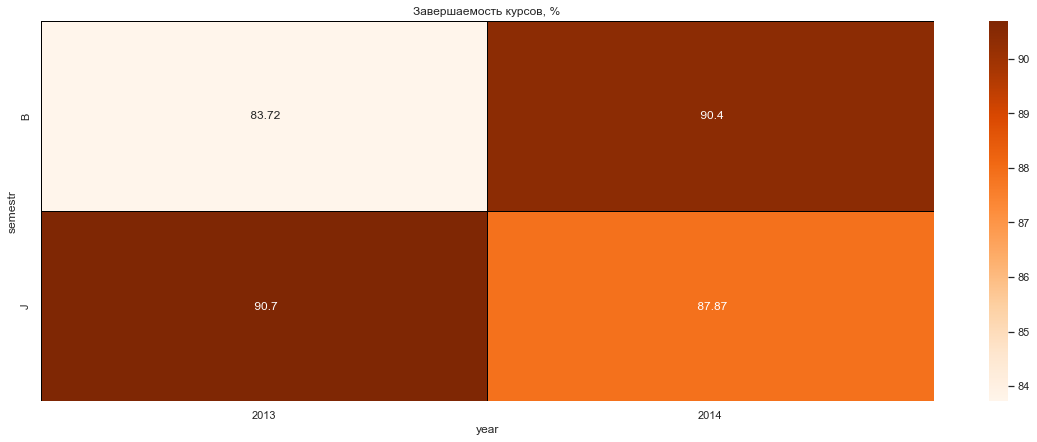

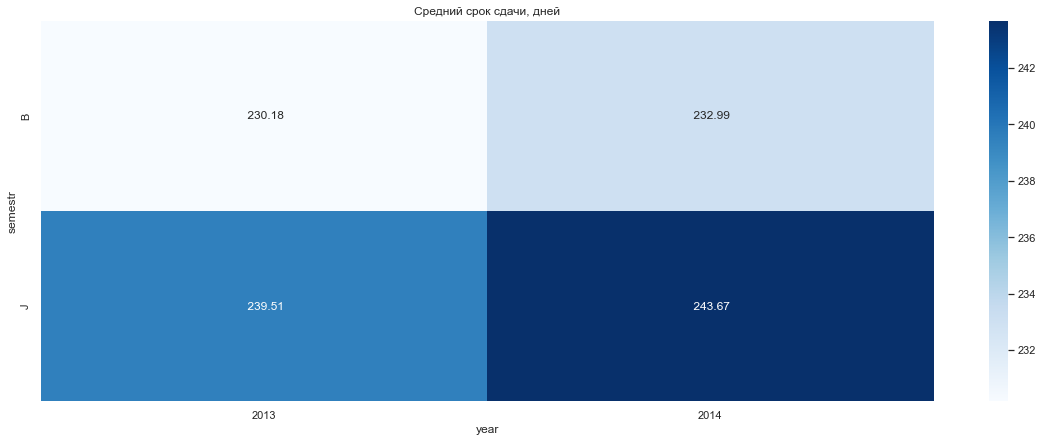

In [500]:
#Применим функцию
cohort_period(df)

***ЗАКЛЮЧЕНИЕ***

Семестр с самой низкой завершаемостью курсов - 2013B (84%).

Семестр с самыми долгими средними сроками сдачи курсов - 2014J (244 дня)

**6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй адаптированные RFM-кластеры студентов, чтобы качественно оценить свою аудиторию. В адаптированной кластеризации можешь выбрать следующие метрики: R - среднее время сдачи одного экзамена, F - завершаемость курсов, M - среднее количество баллов, получаемое за экзамен. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 0.1 до 0.5, monetary от 55 до 72 баллов**

Для формирования кластеров расчитаем следующие метрики:

R — среднее время сдачи одного экзамена. Врмя сдачи считается в днях от начала семестра. Под сдачей понимается успешное прохождение экзамена.

F — завершаемость курсов, процент завершенных курсов от общего количества регистраций на курсы.

M — среднее количество баллов, получаемое за экзамен

In [715]:
#Подготовим таблицу для проведения анализа
df_assess_studentAs = pd.merge(assessments, studentAssessment, on='id_assessment')
df_assess_studentAs

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score
0,AAA,2013J,1752,TMA,19.0,10.0,11391,18,0,78.0
1,AAA,2013J,1752,TMA,19.0,10.0,28400,22,0,70.0
2,AAA,2013J,1752,TMA,19.0,10.0,31604,17,0,72.0
3,AAA,2013J,1752,TMA,19.0,10.0,32885,26,0,69.0
4,AAA,2013J,1752,TMA,19.0,10.0,38053,19,0,79.0
...,...,...,...,...,...,...,...,...,...,...
173907,GGG,2014J,37437,TMA,173.0,0.0,652462,172,0,60.0
173908,GGG,2014J,37437,TMA,173.0,0.0,652539,176,0,75.0
173909,GGG,2014J,37437,TMA,173.0,0.0,653157,187,0,70.0
173910,GGG,2014J,37437,TMA,173.0,0.0,653252,171,0,70.0


In [689]:
#Найдем среднее количество баллов и среднее время сдачи одного экзамена любого типа
mean_score_submitted = df_assess_studentAs.groupby('id_student', as_index = False)\
                            .agg({'score': 'mean', 'date_submitted': 'mean'})\
                            .rename(columns = {'score': 'mean_score', 'date_submitted': 'mean_date_submitted'}).round()
mean_score_submitted

,id_student,mean_score,mean_date_submitted
0,6516,62.0,112.0
1,8462,87.0,23.0
2,11391,82.0,112.0
3,23629,82.0,56.0
4,23698,74.0,133.0
...,...,...,...
23364,2698251,58.0,121.0
23365,2698257,68.0,116.0
23366,2698535,39.0,90.0
23367,2698577,64.0,106.0


In [690]:
# Найдем завершаемость курсов для каждого студента (id_student), для этого на первом этапе посчитаем 
#общее количество курсов (начатые курсы + законченные курсы)
studentRegistration['date_unregistration'] = studentRegistration.date_unregistration.fillna(0)

completed_courses = studentRegistration.query("date_unregistration == 0").groupby('id_student', as_index = False)\
                                        .agg({'code_module': 'count'}).sort_values('code_module')\
                                        .rename(columns = {'code_module': 'courses_completed'})
completed_courses

,id_student,courses_completed
0,6516,1
14213,622715,1
14212,622701,1
14211,622686,1
14210,622657,1
...,...,...
12642,605228,3
8484,561208,3
7861,554459,3
7389,548926,3


In [691]:
#Посчитаем количество незаконченных курсов
uncompleted_courses = studentRegistration.query("date_unregistration != 0").groupby('id_student', as_index = False) \
                                          .agg({'code_module': 'count'}).sort_values('code_module') \
                                          .rename(columns = {'code_module': 'courses_uncompleted'})
uncompleted_courses

,id_student,courses_uncompleted
0,3733,1
5667,626321,1
5666,626320,1
5665,626307,1
5664,626296,1
...,...,...
8064,2046628,4
2849,546400,4
4517,596620,4
1187,387276,4


In [692]:
# Соединим в таблице completed_courses и uncompleted_courses
all_courses = uncompleted_courses.merge(completed_courses, on = 'id_student', how = 'outer').fillna(0)

#Добавим колонку с количеством всех начатых курсов (all_started_courses)
all_courses['all_started_courses'] = all_courses['courses_uncompleted'] + all_courses['courses_completed']

all_courses

,id_student,courses_uncompleted,courses_completed,all_started_courses
0,3733,1.0,0.0,1.0
1,626321,1.0,0.0,1.0
2,626320,1.0,0.0,1.0
3,626307,1.0,0.0,1.0
4,626296,1.0,2.0,3.0
...,...,...,...,...
28780,537811,0.0,3.0,3.0
28781,605228,0.0,3.0,3.0
28782,561208,0.0,3.0,3.0
28783,554459,0.0,3.0,3.0


In [693]:
#Проверим корректность данных по id_student, у которого есть как завершенные, так и отмененные курсы
studentRegistration[studentRegistration['id_student'] == 626296]

,code_module,code_presentation,id_student,date_registration,date_unregistration
10098,CCC,2014B,626296,-74.0,-47.0
11962,CCC,2014J,626296,-84.0,0.0
20892,EEE,2014B,626296,-74.0,0.0


In [694]:
#Создадим колонку завершаемость (completion_rate) в таблицу all_courses, 
#разделим общее количество регистраций на количество завершенных курсов
all_courses = all_courses.assign(completion_rate = all_courses['courses_completed'] / all_courses['all_started_courses'] * 100).round(2)

#Удалим колонки courses_uncompleted, courses_completed, all_started_courses из таблицы all_courses
all_courses.drop(columns = {'courses_uncompleted', 'courses_completed', 'all_started_courses'}, inplace=True)

all_courses

,id_student,completion_rate
0,3733,0.00
1,626321,0.00
2,626320,0.00
3,626307,0.00
4,626296,66.67
...,...,...
28780,537811,100.00
28781,605228,100.00
28782,561208,100.00
28783,554459,100.00


In [695]:
#Создадим таблицу для дальнейшей работы и создания кластеров
clasters = mean_score_submitted.merge(all_courses, on = 'id_student', how = 'outer').dropna()
clasters

,id_student,mean_score,mean_date_submitted,completion_rate
0,6516,62.0,112.0,100.0
1,8462,87.0,23.0,0.0
2,11391,82.0,112.0,100.0
3,23629,82.0,56.0,100.0
4,23698,74.0,133.0,100.0
...,...,...,...,...
23364,2698251,58.0,121.0,100.0
23365,2698257,68.0,116.0,100.0
23366,2698535,39.0,90.0,50.0
23367,2698577,64.0,106.0,100.0


In [855]:
#Проведем анализ и посчитаем количество значений по каждом из сегментов (средний балб средний срок сдачи, завершаемость)
cl_comp_rate = pd.DataFrame(clasters.completion_rate.value_counts()).reset_index().rename(columns={'index':'completion_rates', 'completion_rate':'quantity'}).sort_values('completion_rates', ascending=False)
cl_mean_date_sub = pd.DataFrame(clasters.mean_date_submitted.value_counts()).reset_index().rename(columns={'index':'mean_date_submitteds', 'mean_date_submitted':'quantity'}).sort_values('quantity', ascending=False)
cl_mean_score = pd.DataFrame(clasters.mean_score.value_counts()).reset_index().rename(columns={'index':'mean_scores', 'mean_score':'quantity'}).sort_values('quantity', ascending=False)


display_side_by_side(cl_comp_rate, cl_mean_date_sub, cl_mean_score, titles = ['Завершаемость', 'Средний срок сдачи', 'Средняя оценка'])

,completion_rates,quantity
0,100.00,18551
6,75.00,1
4,66.67,66
2,50.00,1259
3,33.33,93
5,25.00,11
1,0.00,3370
,mean_date_submitteds,quantity
0,114.0,599
1,121.0,511


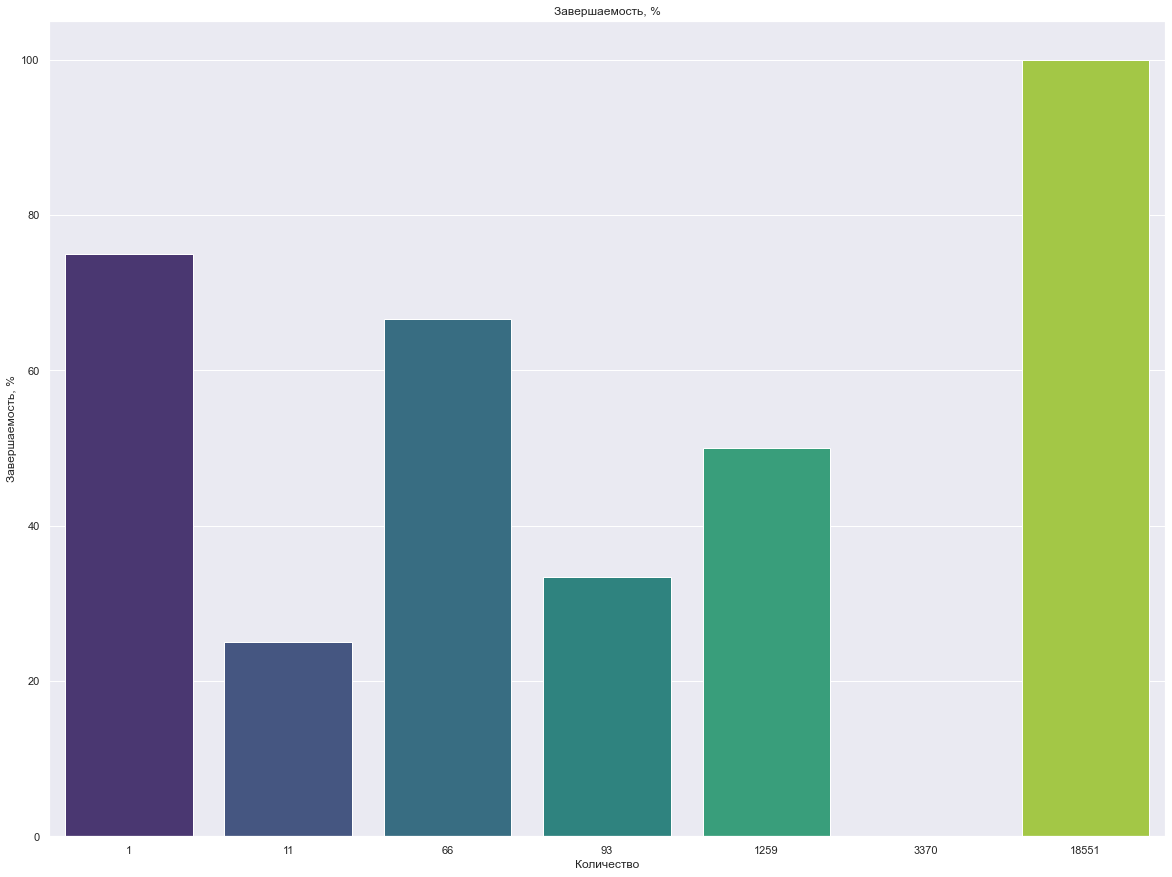

In [709]:
#Визуализируем 
ax = sns.barplot(data=cl_comp_rate, y='completion_rates', x='quantity', palette='viridis')
ax.set_title('Завершаемость, %')
ax.set(xlabel='Количество', ylabel='Завершаемость, %')

plt.show()

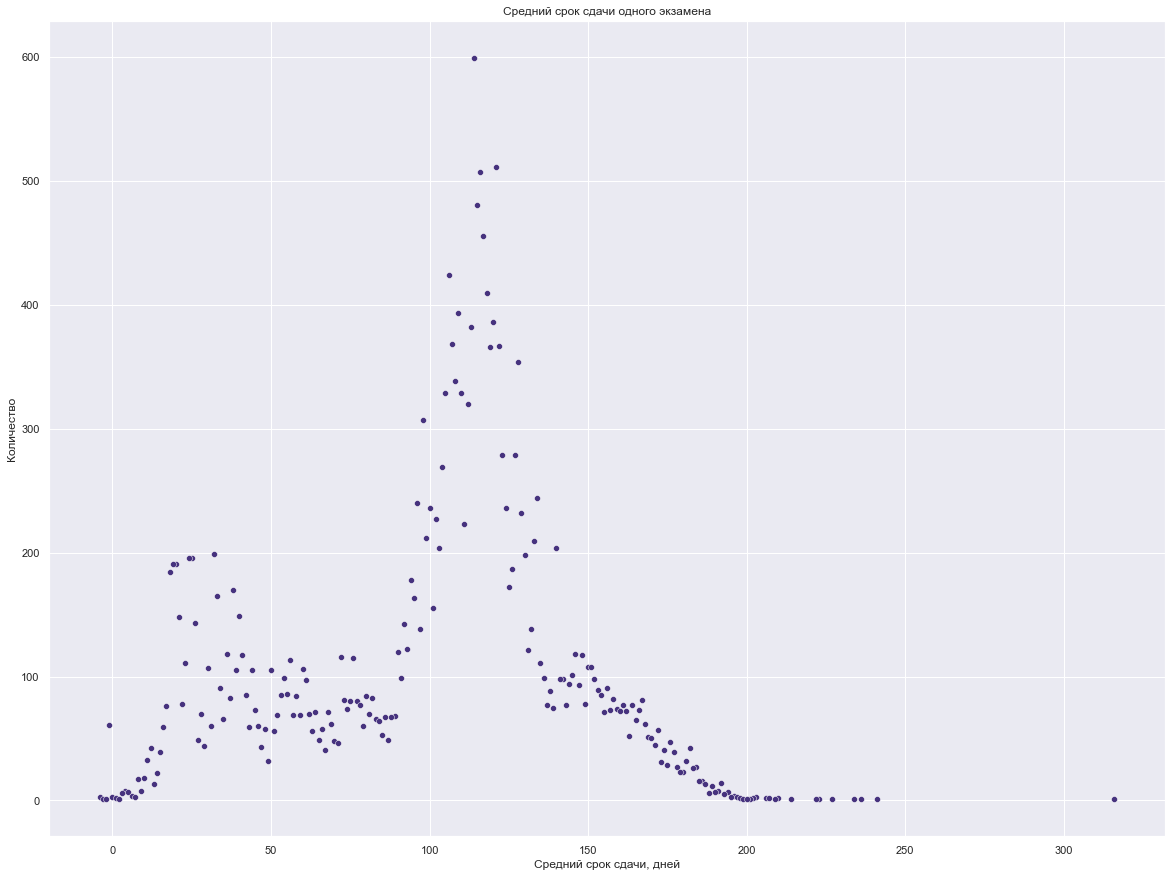

In [712]:
#Визуализируем
sns.set(rc={'figure.figsize':(20,15)}, palette='viridis')
ax = sns.scatterplot(data=cl_mean_date_sub, y='quantity', x='mean_date_submitteds', palette='viridis')
ax.set_title('Средний срок сдачи одного экзамена')
ax.set(xlabel='Средний срок сдачи, дней', ylabel='Количество')

plt.show()

In [738]:
#Посмотрим какие дедлайны есть по экзаменам
deadline_exam=assessments.date.unique()
deadline_values = pd.Series(deadline_exam)
deadline_values.sort_values()

17     12.0
21     18.0
0      19.0
51     20.0
33     23.0
      ...  
62    236.0
44    240.0
50    241.0
48    261.0
5       NaN
Length: 75, dtype: float64

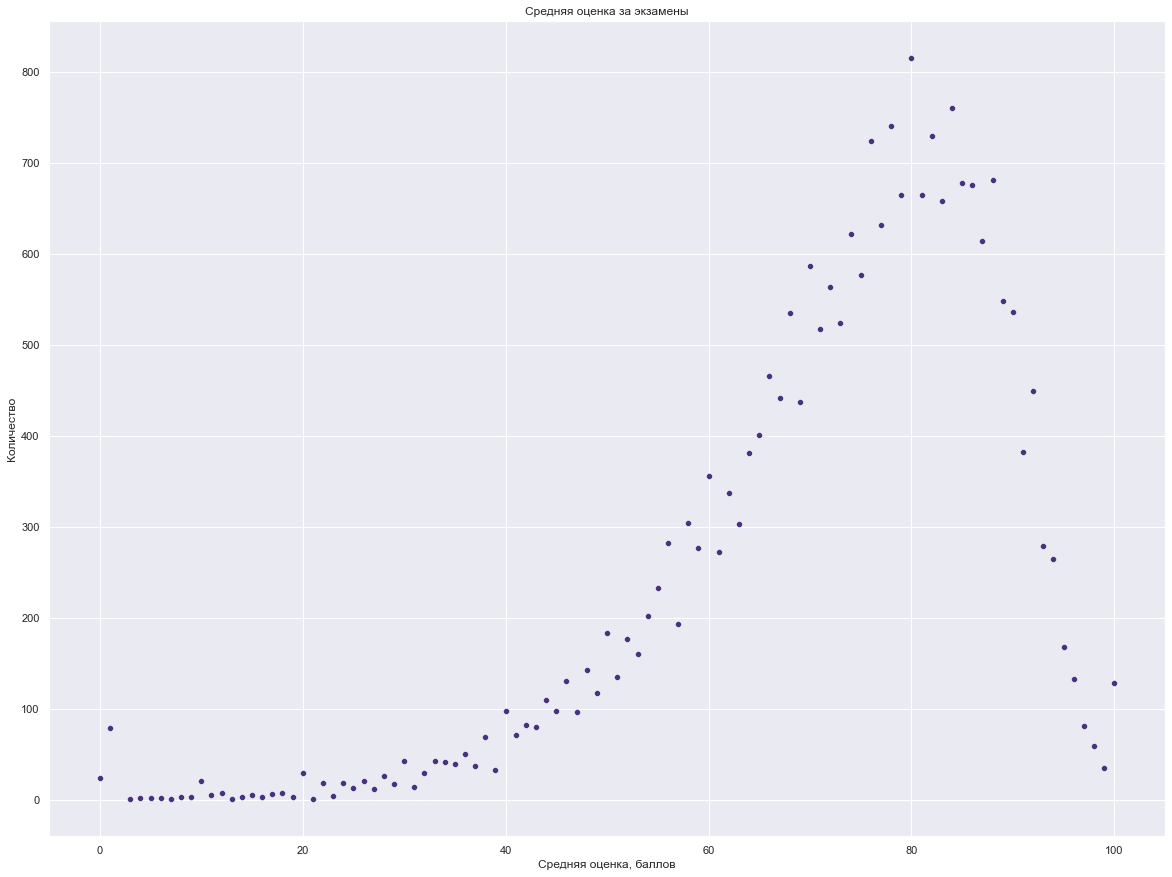

In [711]:
#Визуализируем
sns.set(rc={'figure.figsize':(20,15)}, palette='viridis')
ax = sns.scatterplot(data=cl_mean_score, y='quantity', x='mean_scores', palette='viridis')
ax.set_title('Средняя оценка за экзамены')
ax.set(xlabel='Средняя оценка, баллов', ylabel='Количество')

plt.show()

In [706]:
# с помощью метода .describe ()  просмотрим некоторых основные статистические данные
clasters.describe()

,id_student,mean_score,mean_date_submitted,completion_rate
count,2.335100e+04,23351.000000,23351.000000,23351.000000
mean,7.092954e+05,73.143848,100.126718,82.476121
std,5.558086e+05,15.544487,41.473518,35.978771
min,6.516000e+03,0.000000,-4.000000,0.000000
25%,5.046185e+05,65.000000,74.000000,100.000000
50%,5.895780e+05,76.000000,110.000000,100.000000
75%,6.451520e+05,84.000000,125.000000,100.000000
max,2.698588e+06,100.000000,316.000000,100.000000


Выделим кластеры:

***R — среднее время сдачи одного экзамена***

Можно выделить 2 варианта формирования класторов:

***1 вариант*** - по пронцентилям от 0 до 25%, от 25% до 75%, от 75% до 100%

***2 вариант*** - по окончательным датам сдачи тестов

Выбираем вариент по дедланам для тестов.
В таблице assessments['date'] содержится информация об окончательной дате сдачи теста. Рассчитывается как количество дней с момента начала семестра. Деадлайны от 12 до 261 дней

Выделяем следующие категории:

-***категория Перезачеты*** - значения от -5 до 12 - В данную категорию попадают студенты имеющие перезачет(отрицательные значения). Также фактические дедлайны начинаются не ранее 12го дня со старта курса.
(есть риск попадания в данную категорию студентов сдавших экзамен после дедлайна по конкретному курсу, для учета данного аспекта необходимо соответствующим образом предобработать данные, на данном этапе неизвестна необходимость данной операции, поэтому данный аспект не учитываем)

-***"категория Экзамены сданные в срок"*** - значения от 12 до 262 - В данную категорию попадают студенты сдавшие экзамены в срок дедлайна

-***категория Экзамены сданные после дедлайна*** - значения от 262 до 320 - В данную категорию попадают студенты сдавшие экзамены после деадлайна


Среднее значение составляет 100 дней.


***F — завершаемость курсов***

значения от -1 до 20 - студенты, которые не завершили ни одного экзамена

значения от 20 до 75 - студенты, которые сдали один или несколько экзаменов (но не все, на которые были зарегистрированы)

значения от 75 до 101 - студенты, которые сдали все экзамены, на которые были зарегистрированы


***M — среднее количество баллов***

значения от -1 до 40 - студенты не сдавшие экзамен

значения от 40 до 84 - студенты сдавшие экзамен средне или хорошо

значения от 84 до 101 - особо успешные студенты. Берем по 75му процентилю. В данную категорию попадают 25% студентов

In [739]:
# Добавим в таблицу кластеры: "R — среднее время сдачи одного экзамена, F — завершаемость курсов, M — среднее количество баллов
clasters['R'] = pd.cut(clasters["mean_date_submitted"], [-5, 12, 262, 320], labels = [1, 2, 3])
clasters['F'] = pd.cut(clasters["completion_rate"], [-1, 20, 75, 101], labels = [1, 2, 3])
clasters['M'] = pd.cut(clasters["mean_score"], [-1, 40, 84, 101], labels = [1, 2, 3])

In [740]:
clasters

,id_student,mean_score,mean_date_submitted,completion_rate,R,F,M
0,6516,62.0,112.0,100.0,2,3,2
1,8462,87.0,23.0,0.0,2,1,3
2,11391,82.0,112.0,100.0,2,3,2
3,23629,82.0,56.0,100.0,2,3,2
4,23698,74.0,133.0,100.0,2,3,2
...,...,...,...,...,...,...,...
23364,2698251,58.0,121.0,100.0,2,3,2
23365,2698257,68.0,116.0,100.0,2,3,2
23366,2698535,39.0,90.0,50.0,2,2,1
23367,2698577,64.0,106.0,100.0,2,3,2


In [323]:
# Создаем колонку с RFM кластером для каждого студента
clasters = clasters.astype({'R': 'str','F': 'str','M': 'str'})
clasters['RFM'] = clasters['R'] + clasters['F'] + clasters['M']
clasters.drop(columns = {'mean_score', 'mean_date_submitted', 'completion_rate', 'R' ,'F', 'M'},inplace = True)
clasters

,id_student,RFM
0,6516,232
1,8462,113
2,11391,233
3,23629,133
4,23698,332
...,...,...
23364,2698251,332
23365,2698257,232
23366,2698535,221
23367,2698577,232


In [324]:
#Сгруппируем студентов по RFM
clasters_2 = clasters.groupby('RFM', as_index=False) \
    .agg({'id_student':'count'}) \
    .rename(columns = {'id_student':'count'}) \
    .sort_values('count', ascending=False)
clasters_2

,RFM,count
16,232,5329
25,332,3879
17,233,3761
26,333,3129
1,112,1781
7,132,1622
2,113,675
13,222,546
8,133,496
10,212,362


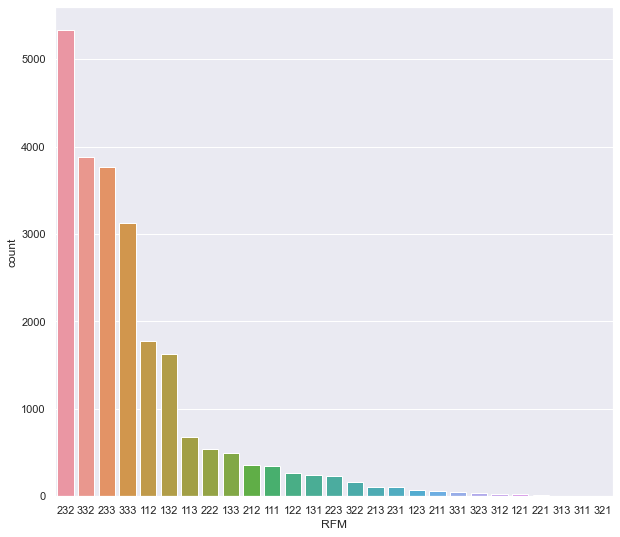

In [825]:
#Визуализируем результаты по распределению студентов по RFM
sns.barplot(data=clasters_2, x='RFM', y='count')

ax.set_title('Распределение студентов по RFM')
ax.set(xlabel='RFM', ylabel='Число студентов')

plt.show()

***ЗАКЛЮЧЕНИЕ***

***R (recency) — среднее время сдачи одного экзамена***

***1 категория*** - Перезачеты

***2 категория*** - Экзамены сданные в срок 

***3 категория*** - Экзамены сданные после дедлайна 

***F (frequency) — завершаемость курсов***

***1 категория*** - студенты, которые не завершили ни одного экзамена

***2 категория*** - студенты, которые сдали один или несколько экзаменов (но не все, на которые были зарегистрированы)

***3 категория*** - студенты, которые сдали все экзамены, на которые были зарегистрированы

***M (monetary) — среднее количество баллов***

***1 категория*** - студенты не сдавшие экзамен

***2 категория*** - студенты сдавшие экзамен средне или хорошо

***3 категория*** - особо успешные студенты

Было выделено 4 сегмента, исходя из комбинаций RFM:

***Группа 1*** (133, 233, 333) самые успешные студенты

Могут быть применимы мотивационные меры (стипендия, скидки на обучение и т.п.)

***Группа 2*** (132, 232 332) студенты с хорошей и средней успеваемостью

Студенты, без особых проблем в обучении. Исключение 332, сдавшие экзамен после дедлайна

***Группа 3*** (122, 123, 222, 223, 322, 323) + (131, 231, 121, 221, 321) студенты с долгами (сдали не все экзамены)

Могут быть применимы дополнительные меры для повышения мотивации студентов

***Группа 4*** (111, 113, 311, 211, 212, 213, 313, 311, 312) студенты не завершившие не один курс

Студенты могут быть отчислены, либо отправлены в академический отпуск

*Примечание: есть противоречия, студент не может получить положительную оценку за экзамен, если не завершил ни одного экзамена. Поэтому необходимо скорректировать кластеры в RFM анализе после общения с заказчиком и уточнить, протеворечивые моменты и то, какие кластеры и в последующем группы видит заказчик*


***Ниже представлена визуализация распрееделения студентов по сформированным группам***

In [830]:
#Посчитаем количество студентов в сформированных группах для каждой группы
group_1 = clasters_2.query("RFM == '133' or RFM == '233' or RFM == '333'")[['count']].sum() \
                        .reset_index().drop(columns={'index'}).rename(columns={0:'group_1'})
group_1

,group_1
0,7386


In [802]:
group_2 = clasters_2.query("RFM == '132' or RFM == '232' or RFM == '332'")[['count']].sum() \
                        .reset_index().drop(columns={'index'}).rename(columns={0:'group_2'})
group_2

,group_2
0,10830


In [801]:
group_3 = clasters_2.query("RFM == '122' or RFM == '123' or RFM == '222' or RFM == '223' or RFM == '322' \
                            or RFM == '323' or RFM == '131' or RFM == '231' or RFM == '121' or RFM == '221' \
                            or RFM == '321'")[['count']].sum() \
                        .reset_index().drop(columns={'index'}).rename(columns={0:'group_3'})
group_3

,group_3
0,1720


In [800]:
group_4 = pd.DataFrame(clasters_2.query("RFM == '111' or RFM == '113' or RFM == '311' or RFM == '211' or RFM == '212' \
                            or RFM == '213' or RFM == '313' or RFM == '311' or RFM == '312'")[['count']].sum()) \
                        .reset_index().drop(columns={'index'}).rename(columns={0:'group_4'})
group_4

,group_4
0,1589


In [852]:
#Соединим сумму по группам в результирующую таблицу
result = pd.concat([group_1, group_2, group_3, group_4], axis=1)

result

,group_1,group_2,group_3,group_4
0,7386,10830,1720,1589


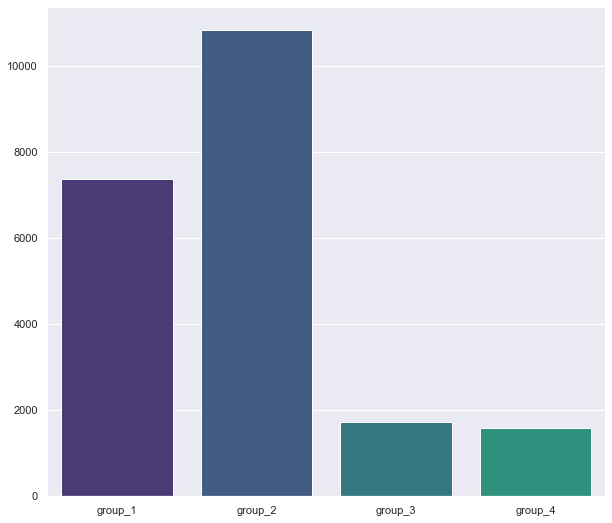

In [828]:
#Визуализируем распределние студентов по группам
sns.barplot(data=result)

ax.set_title('Распределение студентов по группам')
ax.set(xlabel='Группы', ylabel='Количество студентов')

plt.show()

In [847]:
#Построим круговую диаграмму распределения студентов по группам в процентном соотношении
Row_list =[]

for i in range((result.shape[0])):

    Row_list.append(list(result.iloc[i, :]))

Row_list

[[7386, 10830, 1720, 1589]]

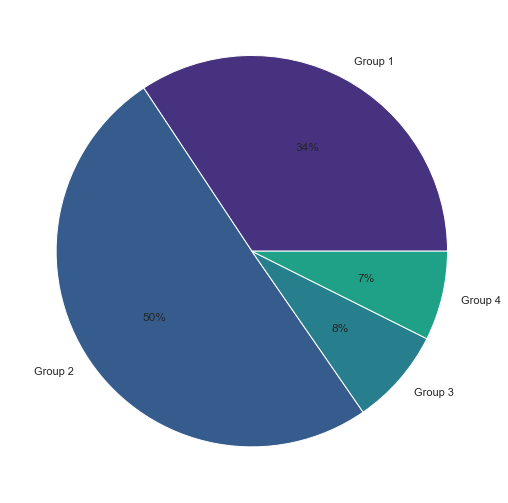

In [858]:
labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4']
data = 7386, 10830, 1720, 1589
plt.pie(data, labels = labels, autopct='%.0f%%')

plt.show()

#Группа 1 самые успешные студенты
#Группа 2 студенты с хорошей и средней успеваемостью
#Группа 3 студенты с долгами (сдали не все экзамены)
#Группа 4 студенты не завершившие не один курс